<a href="https://colab.research.google.com/github/Asad1287/50_ML_Projects_50_Days/blob/main/Day_1_DiscrimantiveVsGenerativeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Number Generator

In [2]:
import numpy as np

class SimpleNumberGenerator:
    def __init__(self, input_size=10, hidden_size=8):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 9) * 0.01
        self.b2 = np.zeros((1, 9))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def generate_number(self, noise):
        # Forward pass
        probabilities = self.forward(noise)

        # Convert to number (1-9)
        number = np.argmax(probabilities) + 1

        return number

# Example usage
if __name__ == "__main__":
    # Create generator
    generator = SimpleNumberGenerator()

    # Generate some example numbers
    for _ in range(5):
        # Generate random noise
        noise = np.random.randn(1, 10)

        # Generate number
        number = generator.generate_number(noise)
        print(f"Generated number: {number}")

    # Generate multiple numbers at once
    batch_noise = np.random.randn(10, 10)
    batch_probs = generator.forward(batch_noise)
    batch_numbers = np.argmax(batch_probs, axis=1) + 1
    print("\nBatch generation:")
    print(f"Generated numbers: {batch_numbers}")

Generated number: 7
Generated number: 7
Generated number: 7
Generated number: 7
Generated number: 7

Batch generation:
Generated numbers: [7 7 7 7 7 7 7 7 7 7]


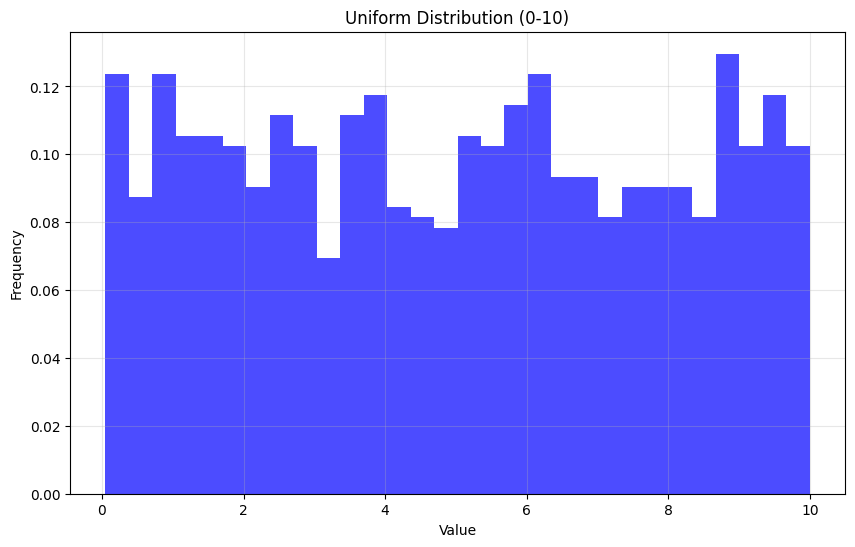

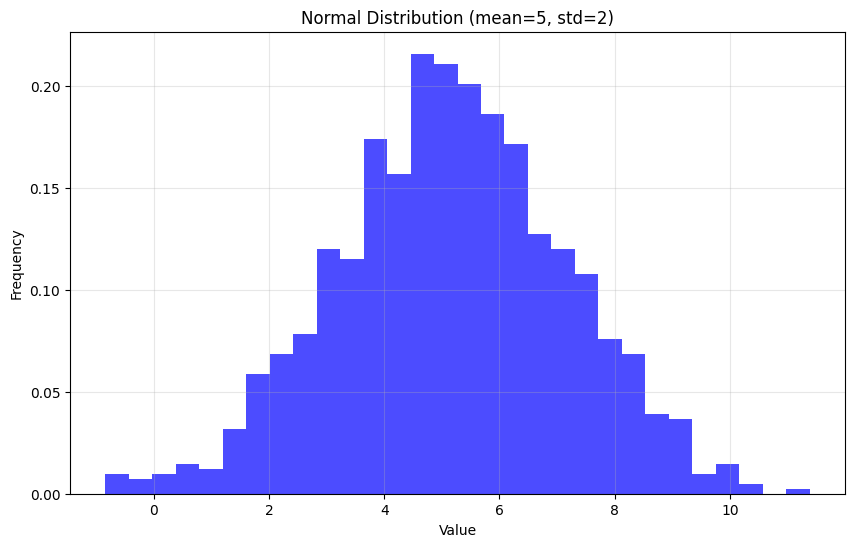

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_numbers(size=1000, distribution='uniform', **kwargs):
    """
    Generate random numbers using different distributions

    Parameters:
    size (int): Number of random numbers to generate
    distribution (str): Type of distribution ('uniform', 'normal', 'poisson')
    **kwargs: Additional parameters for specific distributions
    """
    if distribution == 'uniform':
        low = kwargs.get('low', 0)
        high = kwargs.get('high', 1)
        numbers = np.random.uniform(low=low, high=high, size=size)
    elif distribution == 'normal':
        mean = kwargs.get('mean', 0)
        std = kwargs.get('std', 1)
        numbers = np.random.normal(loc=mean, scale=std, size=size)
    elif distribution == 'poisson':
        lam = kwargs.get('lambda', 5)
        numbers = np.random.poisson(lam=lam, size=size)
    else:
        raise ValueError("Unsupported distribution type")

    return numbers

def plot_distribution(numbers, title="Random Number Distribution"):
    """
    Plot the distribution of random numbers

    Parameters:
    numbers (array): Array of random numbers
    title (str): Title for the plot
    """
    plt.figure(figsize=(10, 6))
    plt.hist(numbers, bins=30, density=True, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate uniform random numbers
    uniform_nums = generate_random_numbers(size=1000, distribution='uniform', low=0, high=10)
    plot_distribution(uniform_nums, "Uniform Distribution (0-10)")

    # Generate normal random numbers
    normal_nums = generate_random_numbers(size=1000, distribution='normal', mean=5, std=2)
    plot_distribution(normal_nums, "Normal Distribution (mean=5, std=2)")



##Plain Python Classifier

In [3]:
import numpy as np

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100)  # Input values
true_W = 2.5  # True weight
true_beta = 1.0  # True bias
y = true_W * X + true_beta + np.random.normal(0, 1, 100)  # Add some noise

# Reshape X for matrix operations
X = X.reshape(-1, 1)

class LinearRegressionGD:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.W = np.random.randn()  # Initialize random weight
        self.beta = np.random.randn()  # Initialize random bias
        self.history = []

    def predict(self, X):
        """Make predictions using current W and beta"""
        return self.W * X + self.beta

    def compute_gradients(self, X, y):
        """Compute gradients for W and beta"""
        m = len(y)
        y_pred = self.predict(X)
        error = y_pred - y

        # Gradient for W
        dW = (1/m) * np.sum(error * X)
        # Gradient for beta
        dbeta = (1/m) * np.sum(error)

        return dW, dbeta

    def compute_loss(self, X, y):
        """Compute Mean Squared Error loss"""
        m = len(y)
        y_pred = self.predict(X)
        return (1/(2*m)) * np.sum((y_pred - y)**2)

    def train(self, X, y, n_iterations=1000):
        """Train the model using gradient descent"""
        for i in range(n_iterations):
            # Compute gradients
            dW, dbeta = self.compute_gradients(X, y)

            # Update parameters
            self.W -= self.learning_rate * dW
            self.beta -= self.learning_rate * dbeta

            # Compute loss
            loss = self.compute_loss(X, y)
            self.history.append((self.W, self.beta, loss))

            # Print progress every 100 iterations
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}: W = {self.W:.4f}, beta = {self.beta:.4f}, Loss = {loss:.4f}")

# Create and train model
model = LinearRegressionGD(learning_rate=0.001)
print("Initial parameters:")
print(f"W = {model.W:.4f}, beta = {model.beta:.4f}")
print(f"True parameters: W = {true_W}, beta = {true_beta}")

# Train the model
print("\nTraining...")
model.train(X, y)

# Print final results
print("\nFinal parameters:")
print(f"W = {model.W:.4f}, beta = {model.beta:.4f}")
print(f"True parameters: W = {true_W}, beta = {true_beta}")

# Calculate R-squared score
y_pred = model.predict(X)
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - (ss_res / ss_tot)
print(f"\nR-squared score: {r2:.4f}")

# Print loss progression
print("\nLoss progression:")
for i, (_, _, loss) in enumerate(model.history):
    if i % 200 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

Initial parameters:
W = -1.4154, beta = -0.4206
True parameters: W = 2.5, beta = 1.0

Training...
Iteration 100: W = -1025384873314200137058741816483569991680.0000, beta = -154177057128199101912552688264811642880.0000, Loss = 1841441124072661264593386633500937823060681705386708973667296238878671503443886080.0000
Iteration 200: W = -307822960592200469736608768581575675827398541775825198647874279892594529927168.0000, beta = -46284316665604381181818041793812649817262504751688550496042722232002687270912.0000, Loss = 165953358837435981205325944122043229682151695434002803493586413595674398239358375022557847058993466842242226863688688316905193475256231462406671760827005009920.0000
Iteration 300: W = -92409179746805483727681241604804149649274073128308883706724995442210341973488591683318419068723447870225052057206784.0000, beta = -13894661171413193450482256994674597233080873167178705848839876498228855166940761425111113764320780957846688734642176.0000, Loss = 149559586507529319259721781292597494

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-3-87aa8ecf38c9>:41: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((y_pred - y)**2)
<ipython-input-3-87aa8ecf38c9>:22: RuntimeWarning: invalid value encountered in multiply
  return self.W * X + self.beta
